<a href="https://colab.research.google.com/github/GbemisolaAyejuni/CIND820-Big-Data-Analytics-Project/blob/main/Sentiment_Analysis_Vader_on_Original_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Imports

In [ ]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#comparison analysis metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay, matthews_corrcoef

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# 2. Data

In [ ]:
#loading the review dataset
review = pd.read_csv('/content/reviews_reviewcount.zip')

In [ ]:
#filtering out the stars and text columns
reviews = review[['text', 'stars']].reset_index().drop(columns='index')

In [ ]:
#save reviews dataframe file

reviews.to_csv('reviews_text_stars.csv', index=False)

In [ ]:
print(reviews.shape)
reviews.head()

(4719632, 2)


,text,stars
0,if you decide to eat here just be aware it is ...,3
1,family diner had the buffet eclectic assortmen...,3
2,wow yummy different delicious our favorite...,5
3,cute interior and owner gave us tour of upcom...,4
4,i am a long term frequent customer of this est...,1


# 3. Sentiment Analysis using Vader

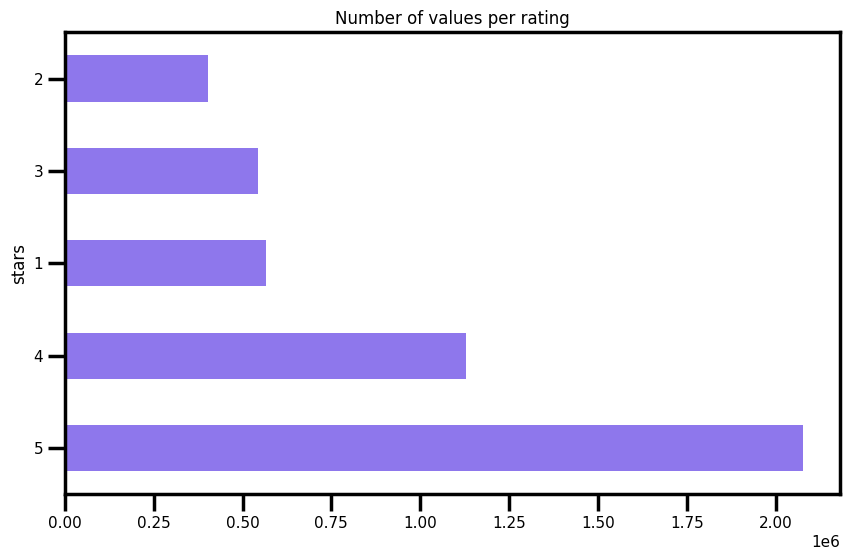

In [ ]:
#number of values per star rating
reviews['stars'].value_counts().plot.barh(color = '#8e77ec', figsize = (10,6), title = 'Number of values per rating');

In [ ]:
#creating labels from stars
reviews['label'] = reviews['stars'].apply(lambda s: 'positive' if s >= 4 else ('negative' if s <= 2 else 'neutral'))

In [ ]:
reviews.head()

,text,stars,label
0,if you decide to eat here just be aware it is ...,3,neutral
1,family diner had the buffet eclectic assortmen...,3,neutral
2,wow yummy different delicious our favorite...,5,positive
3,cute interior and owner gave us tour of upcom...,4,positive
4,i am a long term frequent customer of this est...,1,negative


# 3.1 Computing Polarity Scores and Compound Scores

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#creating a sid object from the VADER
sid = SentimentIntensityAnalyzer()

In [ ]:
#creating columns in the dataframe that contain relevant data from the polarity scores
reviews['polarity_scores'] = reviews['text'].apply(lambda text: sid.polarity_scores(str(text)))
reviews['compound_score']  = reviews['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
reviews['compound_label'] = reviews['compound_score'].apply(lambda s: 'negative' if s < 0 else ('neutral' if s < 0.5 else 'positive'))
reviews.head()

,text,stars,label,polarity_scores,compound_score,compound_label
0,if you decide to eat here just be aware it is ...,3,neutral,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...",0.8491,positive
1,family diner had the buffet eclectic assortmen...,3,neutral,"{'neg': 0.035, 'neu': 0.709, 'pos': 0.257, 'co...",0.9201,positive
2,wow yummy different delicious our favorite...,5,positive,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.9509,positive
3,cute interior and owner gave us tour of upcom...,4,positive,"{'neg': 0.017, 'neu': 0.71, 'pos': 0.272, 'com...",0.9798,positive
4,i am a long term frequent customer of this est...,1,negative,"{'neg': 0.133, 'neu': 0.672, 'pos': 0.195, 'co...",0.5859,positive


3.2 Comparison of Compound Score and Original Label

In [ ]:
print('Accuracy score: ', accuracy_score(reviews.label, reviews.compound_label))

Accuracy score:  0.7556358207589067


In [ ]:
print('Classification Report:\n', classification_report(reviews.label, reviews.compound_label))

Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.49      0.60    970773
     neutral       0.19      0.12      0.15    542708
    positive       0.80      0.94      0.87   3206151

    accuracy                           0.76   4719632
   macro avg       0.59      0.52      0.54   4719632
weighted avg       0.73      0.76      0.73   4719632



In [ ]:
# Calculate Matthews Correlation Coefficient (MCC)
print('Matthews Correlation Coefficient: ', matthews_corrcoef(reviews.label, reviews.compound_label))

In [ ]:
print(confusion_matrix(reviews.label, reviews.compound_label))

[[ 474820  157871  338082]
 [  69407   65284  408017]
 [  55265  124667 3026219]]


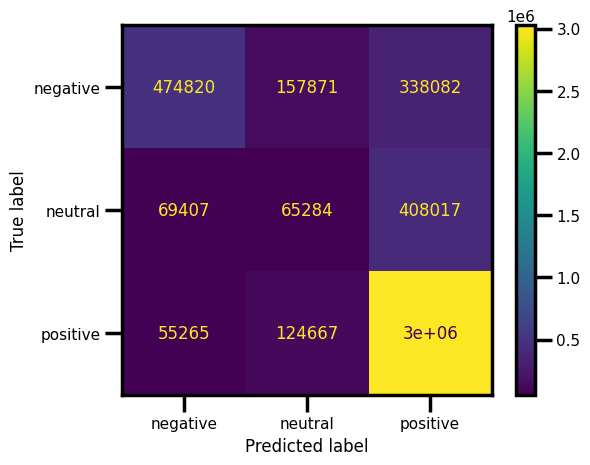

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(reviews.label, reviews.compound_label),
                              display_labels=['negative', 'neutral', 'positive'])

disp.plot()
plt.show;